In [1]:
import pandas as pd
# from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re
import string
import csv

In [2]:

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer



In [3]:
air_data= pd.read_csv('Tweets.csv')

In [4]:
air_data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [5]:
air_missing=air_data[air_data.negativereason.isnull()]

In [6]:
air_missing.shape


(5462, 15)

In [7]:
air_data[air_data.airline_sentiment_confidence.isnull()]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone


In [8]:
air_data.groupby('airline').count()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
airline,,,,,,,,,,,,,,
American,2759,2759,2759,1960,2190,14,2759,11,2759,2759,183,2759,1848,1791
Delta,2222,2222,2222,955,1184,7,2222,7,2222,2222,160,2222,1604,1613
Southwest,2420,2420,2420,1186,1445,8,2420,5,2420,2420,160,2420,1596,1659
US Airways,2913,2913,2913,2263,2470,3,2913,2,2913,2913,150,2913,1844,1851
United,3822,3822,3822,2633,3000,8,3822,7,3822,3822,319,3822,2633,2527
Virgin America,504,504,504,181,233,0,504,0,504,504,47,504,382,379


In [9]:
air_data[air_data.negativereason.isnull()].count()

tweet_id                        5462
airline_sentiment               5462
airline_sentiment_confidence    5462
negativereason                     0
negativereason_confidence       1344
airline                         5462
airline_sentiment_gold             8
name                            5462
negativereason_gold                0
retweet_count                   5462
text                            5462
tweet_coord                      356
tweet_created                   5462
tweet_location                  3871
user_timezone                   3812
dtype: int64

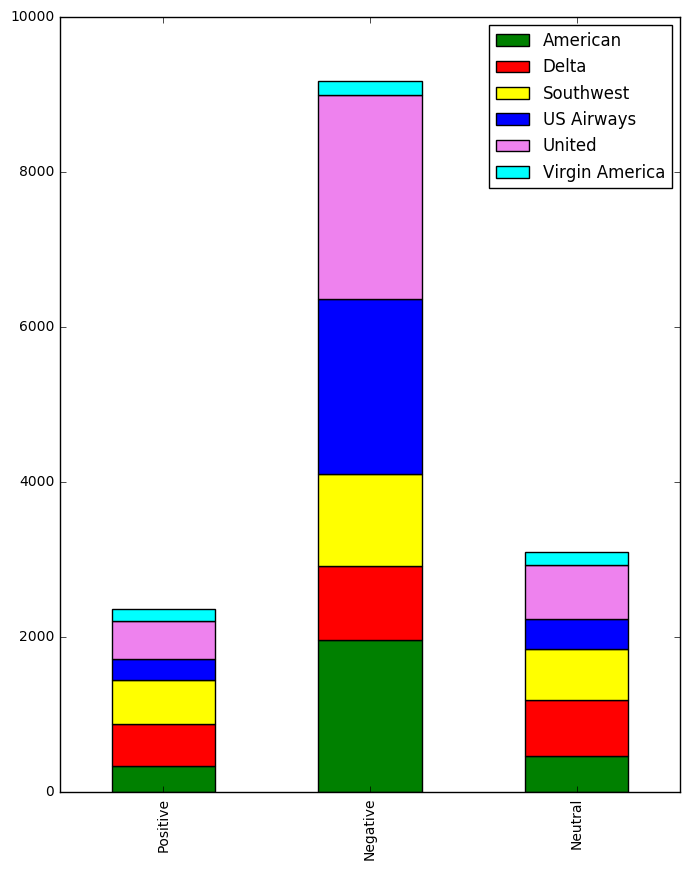

In [10]:
air_positive = air_data[air_data['airline_sentiment']=='positive']['airline'].value_counts()
air_negative = air_data[air_data['airline_sentiment']=='negative']['airline'].value_counts()
air_neutral = air_data[air_data['airline_sentiment']=='neutral']['airline'].value_counts()
df = pd.DataFrame([air_positive,air_negative,air_neutral])
df.index = ['Positive','Negative','Neutral']
df.plot(kind='bar',stacked=True, figsize=(8,10),color = ['green','red','yellow','blue','violet','cyan'])


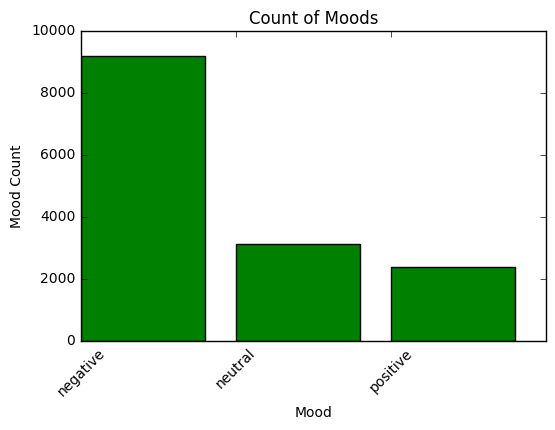

In [11]:
Mood_count=air_data['airline_sentiment'].value_counts()
Index = [1,2,3]
plt.bar(Index,Mood_count,color = ['green'])
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [12]:
air_data.head(10)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [13]:

# non_neutrals = ['positive','negative']
# air_non_neutral = air_data[air_data.airline_sentiment != 'neutral']
# air_non_neutral['sentiment'] = air_non_neutral['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [14]:
air_data['airline_sentiment']=air_data.airline_sentiment.map({'negative':0,'neutral':1,'positive':2})

In [15]:
air_data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [16]:
air_data.to_csv('result.csv', index=False)

In [17]:
# air_data['cleansed_text']=air_data.cleansed_text.str.replace('\t','')

In [18]:
# air_positive = air_data[air_data['airline_sentiment']==4]

In [19]:
# air_positive_words=air_positive.cleansed_text

In [20]:
# air_positive_words.head(5)

In [21]:
# air_negative=air_data[air_data['airline_sentiment']==0]

In [22]:
# air_negative_words=air_negative.cleansed_text
# air_negative_words.head(5)

In [23]:
# air_neutral=air_data[air_data['airline_sentiment']==2]

In [24]:
# air_neutral_words=air_neutral.cleansed_text
# air_neutral_words.head(5)

In [25]:
air_data_modified=air_data

In [26]:
air_data_modified.drop('tweet_id',1,inplace=True)

In [27]:
air_data_modified.drop('negativereason',1,inplace=True)

In [28]:
air_data_modified.drop('negativereason_confidence',1,inplace=True)

In [29]:
air_data_modified.drop('airline_sentiment_gold',1,inplace=True)

In [30]:
air_data_modified.drop('name',1,inplace=True)

In [31]:
air_data_modified.drop('negativereason_gold',1,inplace=True)

In [32]:
air_data_modified.drop('retweet_count',1,inplace=True)

In [33]:
air_data_modified.drop('tweet_coord',1,inplace=True)

In [34]:
air_data_modified.drop('tweet_created',1,inplace=True)

In [35]:
air_data_modified.drop('user_timezone',1,inplace=True)

In [36]:
air_data_modified.drop('tweet_location',1,inplace=True)

In [37]:
air_data_modified['text'].to_csv('result.csv', index=False)

In [38]:
air_data_modified['text'].head(10)

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
7    @VirginAmerica Really missed a prime opportuni...
8      @virginamerica Well, I didn't…but NOW I DO! :-D
9    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object

In [39]:
fp=open('result.csv','r')
line=fp.readline().rstrip()
# print(line)
arrays=[] 
while line:
    sub_array=[]
    sub_arrays=line.split(',')
#     print(sub_arrays)
#     arrays=sub_arrays[3]
#     print(arrays)
#     processed=re.sub('@[^\s]+','',sub_arrays)
    processed=sub_arrays[0]
#     processed=processed.rstrip()
    processed=processed.replace('\"',"")
    processed=processed.replace('\'',"")
    processed=processed.replace('\.',"") 
    processed=processed.rstrip() 
    processed=processed.replace('\#',"") 
    processed=re.sub('@[^\s]+','',processed)
    arrays.append(processed)
#     arrays.append(sub_arrays[10])
#     new_arrays.append(processed)
    line=fp.readline()
# print(type(processed)) 

In [40]:
print(arrays)

[' What  said.', ' plus youve added commercials to the experience... tacky.', ' I didnt today... Must mean I need to take another trip!', ' its really aggressive to blast obnoxious entertainment in your guests faces &amp; they have little recourse', ' and its a really big bad thing about it', ' seriously would pay $30 a flight for seats that didnt have this playing.', 'its really the only bad thing about flying VA', ' yes', ' Really missed a prime opportunity for Men Without Hats parody', ' Well', ' it was amazing', ' did you know that suicide is the second leading cause of death among teens 10-24', ' I &lt;3 pretty graphics. so much better than minimal iconography. :D', ' This is such a great deal! Already thinking about my 2nd trip to  &amp; I havent even gone on my 1st trip yet! ;p', '  Im flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn', ' Thanks!', ' SFO-PDX schedule is still MIA.', ' So excited for my first cross countr

In [41]:
#get rid of the common words
s = set(stopwords.words('english'))

def remove_stopwords(input):
    return [i for i in input.lower().split() if i not in s]
   # print [y for x in y if y not in list(s)]
arrays = pd.DataFrame(arrays)
air_data['cleansed_text'] = arrays
# .apply(lambda x: remove_stopwords(x))
air_data.head(10)

,airline_sentiment,airline_sentiment_confidence,airline,text,cleansed_text
0,1,1.0000,Virgin America,@VirginAmerica What @dhepburn said.,What said.
1,2,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experienc...
2,1,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...,I didnt today... Must mean I need to take ano...
3,0,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious ente...
4,0,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it
5,0,1.0000,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay $30 a flight for seats th...
6,2,0.6745,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",its really the only bad thing about flying VA
7,1,0.6340,Virgin America,@VirginAmerica Really missed a prime opportuni...,yes
8,2,0.6559,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D",Really missed a prime opportunity for Men Wit...
9,2,1.0000,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",Well


In [42]:
# air_data['cleansed_text']=air_data.cleansed_text.stip()

In [43]:
air_positive = air_data[(air_data['airline_sentiment']==2) & (air_data['airline_sentiment_confidence']==1)]

In [44]:
air_positive_words = pd.DataFrame(columns=['word'])

In [45]:
air_positive_words['word']=air_positive['cleansed_text']

In [46]:
air_positive_words.head(5)

,word
9,Well
11,did you know that suicide is the second leadi...
12,I &lt;3 pretty graphics. so much better than ...
14,Im flying your #fabulous #Seductive skies ag...
16,SFO-PDX schedule is still MIA.


In [47]:
air_positive_words.shape

(1515, 1)

In [48]:
air_negative = air_data[(air_data['airline_sentiment']==0)&(air_data['airline_sentiment_confidence']==1)]

In [49]:
air_negative_words = pd.DataFrame(columns=['word'])

In [50]:
air_negative_words['word']=air_negative.cleansed_text

In [51]:
air_negative_words.head(5)

,word
3,its really aggressive to blast obnoxious ente...
4,and its a really big bad thing about it
5,seriously would pay $30 a flight for seats th...
17,So excited for my first cross country flight ...
24,will you be making BOS&gt;LAS non stop perman...


In [52]:
air_negative_words.shape

(7382, 1)

In [53]:
air_neutral = air_data[(air_data['airline_sentiment']==0)&(air_data['airline_sentiment_confidence']==1)]

In [54]:
air_neutral_words = pd.DataFrame(columns=['word'])

In [55]:
air_neutral_words['word']=air_neutral.cleansed_text

In [56]:
air_neutral_words.head(5)

,word
3,its really aggressive to blast obnoxious ente...
4,and its a really big bad thing about it
5,seriously would pay $30 a flight for seats th...
17,So excited for my first cross country flight ...
24,will you be making BOS&gt;LAS non stop perman...


In [57]:
air_neutral_words.shape

(7382, 1)

In [58]:
important_words =['accessable', 'accomplished', 'adaptable', 'admiringly', 'adulation', 'advocated', 'affirmation', 'agility',
       'amazed', 'amiability', 'amusing', 'appreciated', 'articulate', 'astonished', 'attraction', 'available',
       'awesomely', 'beautifully', 'benefactor', 'best', 'blessing', 'bonus', 'brave', 'brighten', 'buoyant',
       'carefree', 'charisma', 'cheerful', 'clarity', 'cleared', 'colorful', 'commitment', 'complemented', 'confident',
       'constructive', 'convienient', 'correctly', 'courtly', 'cushy', 'dawn', 'dedicated', 'delicacy', 'deservedly',
       'dextrous', 'distinctive', 'doubtless', 'earnest', 'easy', 'ecstatic', 'efficiently', 'elatedly', 'eloquently',
       'enchanting', 'endorsement', 'enhanced', 'enlighten', 'enterprising', 'enthusiastic', 'enviably', 'eulogize',
       'exaltation', 'exceeding', 'excellent', 'excites', 'exonerate', 'exuberance', 'eyecatching', 'faithfulness',
       'fantastic', 'fast-paced', 'favorite', 'feisty', 'festive', 'first-in-class', 'flourish', 'formidable',
       'freedom', 'ftw', 'gainfully', 'generosity', 'gladden', 'glistening', 'god-given', 'goood', 'grand', 'gratitude',
       'gush', 'handily', 'hardier', 'healthy', 'helping', 'holy', 'hospitable', 'humorous', 'idyllic', 'immaculately',
       'impressed', 'improving', 'inexpensive', 'innocuous', 'instantly', 'intimacy', 'invigorate', 'irresistibly',
       'joyous', 'keenly', 'laudable', 'lean', 'lighter', 'lovable', 'low-price', 'luckiest', 'luxurious',
       'magnificently', 'marvelously', 'matchless', 'meritorious', 'meticulous', 'modern', 'neat', 'nobly', 'nurturing',
       'opulent', 'outshone', 'overtakes', 'pamperedly', 'patience', 'peach', 'permissible', 'playful', 'pleasure',
       'polished', 'powerfully', 'preferable', 'pretty', 'prodigious', 'profusion', 'promoter', 'prosperous', 'prowess',
       'qualify', 'raptureous', 'reaffirm', 'reclaim', 'recovery', 'reform', 'regally', 'reliable', 'renewed',
       'resourceful', 'restful', 'reverent', 'reward', 'righteously', 'rockstar', 'sagacity', 'satisfied', 'seamless',
       'sensation', 'sharp', 'simplest', 'skillful', 'smiles', 'snazzy', 'soothingly', 'speedily', 'splendor',
       'state-of-the-art', 'steadiness', 'straightforward', 'stunningly', 'sublime', 'succes', 'suitable', 'support',
       'supurbly', 'swankiest', 'talent', 'tenaciously', 'thoughtfully', 'thriving', 'titillatingly', 'tougher',
       'triumphal', 'trusting', 'unabashed', 'undaunted', 'unforgettable', 'unselfish', 'upliftingly', 'valor',
       'victorious', 'vivid', 'well', 'well-intentioned', 'well-wishers', 'willingness', 'wisely', 'woo', 'worthy',
       'zippy', 'abominably', 'abscond', 'abuses', 'accuse', 'achey', 'addict', 'adulterated', 'affront', 'aggrieved',
       'ailing', 'allegation', 'ambivalence', 'anger', 'annoyances', 'antagonize', 'antipathy', 'apathy',
       'apprehension', 'arrogance', 'aspersions', 'atrocity', 'authoritarian', 'aweful', 'back-woods', 'bad', 'bane',
       'barren', 'batty', 'beguile', 'belligerent', 'berserk', 'betraying', 'bias', 'biting', 'blame', 'blather',
       'blindingly', 'blotchy', 'blurry', 'bombard', 'botch', 'brainless', 'breach', 'brimstone', 'bruises', 'brute',
       'bulky', 'bum', 'bunk', 'busybody', 'callous', 'cannibalize', 'carp', 'catastrophe', 'chafe', 'chatterbox',
       'cheerless', 'chore', 'clogged', 'coerce', 'comical', 'complaint', 'conceit', 'condemnable', 'confessions',
       'confrontation', 'cons', 'consternation', 'contemptuously', 'contravene', 'corrupt', 'coupists', 'crafty',
       'crashes', 'creaking', 'cringe', 'criticism', 'crowded', 'crumble', 'culpable', 'cuss', 'damn', 'dark', 'dawdle',
       'death', 'debilitating', 'deceitfully', 'decline', 'defame', 'deficient', 'degeneration', 'dejectedly', 'delude',
       'demolisher', 'denial', 'denunciation', 'deprave', 'deprive', 'desertion', 'desperate', 'despondency', 'destroy',
       'detest', 'detracts', 'deviation', 'diabolic', 'die', 'dilly-dally', 'dirt', 'disadvantageous', 'disagreement',
       'disappointment', 'disasterous', 'discomfit', 'disconsolation', 'discountenance', 'discriminate', 'disgraceful',
       'disgustingly', 'disillusion', 'disintegrates', 'disloyalty', 'disobedience', 'disown', 'displaced', 'disquiet',
       'disrespectablity', 'dissappointed', 'dissembler', 'dissing', 'distaste', 'distraught', 'disturb',
       'divisiveness', 'domineer', 'doubts', 'downhearted', 'drag', 'drastically', 'drippy', 'drowning', 'dumb', 'dust',
       'egomania', 'embarrass', 'emphatically', 'engulf', 'entrapment', 'err', 'eschew', 'exagerate', 'excessive',
       'exhausted', 'expensive', 'expunge', 'extremism', 'failed', 'fallacies', 'falsehood', 'fanaticism', 'fascist',
       'fatally', 'fatuity', 'fearfully', 'felon', 'fibber', 'figurehead', 'flagrant', 'flare', 'fleed', 'flimflam',
       'fool', 'foreboding', 'forsaken', 'frail', 'freaking', 'frenzy', 'frighten', 'fruitless', 'fucking', 'funnily',
       'futile', 'galling', 'gawk', 'gibe', 'glibly', 'goad', 'grainy', 'grievances', 'grisly', 'grudge', 'grumpily',
       'hack', 'hampered', 'harassment', 'hardheaded', 'harpy', 'haste', 'hates', 'hazard', 'heartless', 'hedonistic',
       'hells', 'hideously', 'hoard', 'hopelessness', 'horrifying', 'hubris', 'hurted', 'hypocritical', 'idiotic',
       'ignore', 'ill-sorted', 'illiterate', 'imbecile', 'immoral', 'impeach', 'imperialist', 'impinge', 'impolitic',
       'impotent', 'improbability', 'impudently', 'inaccurate', 'inadvisably', 'incapable', 'inclement', 'incompatible',
       'incongruous', 'inconsistency', 'incorrigibly', 'indecorum', 'indignantly', 'indistinguishable',
       'ineffectualness', 'ineloquently', 'inescapably', 'inexpert', 'infection', 'infiltrators', 'infraction',
       'ingratitude', 'iniquitous', 'inopportune', 'insensitive', 'insincerity', 'instability', 'insufficiency',
       'insupportably', 'intermittent', 'intolerance', 'invader', 'invisible', 'irks', 'irragularity', 'irrecoverably',
       'irrepressible', 'irritant', 'issues', 'jealous', 'jerk', 'judder', 'kill', 'kook', 'laconic', 'lame-duck',
       'lapse', 'lawbreaking', 'leaks', 'lemon', 'lewdness', 'lier', 'listless', 'loathsomely', 'loophole', 'loss',
       'ludicrous', 'lurid', 'madly', 'malevolence', 'maltreatment', 'manipulation', 'massacres', 'meddlesome',
       'mendacious', 'midget', 'misapprehend', 'mischievous', 'miserably', 'misguided', 'misleadingly', 'miss',
       'mistress', 'moan', 'molestation', 'mope', 'mortified', 'muddy', 'murky', 'nagging', 'nauseating', 'negate',
       'nepotism', 'nightmare', 'nonexistent', 'obese', 'obnoxiously', 'obsessively', 'obstructs', 'oddities',
       'offensively', 'onslaught', 'oppressively', 'outcry', 'over-acted', 'overbalanced', 'overloaded', 'overshadow',
       'overstatements', 'overwhelmingly', 'pale', 'panicked', 'pariah', 'patronize', 'peeved', 'perilously',
       'pertinaciously', 'perverted', 'petty', 'pigs', 'pitilessly', 'plight', 'poisonously', 'poor', 'prattle',
       'prejudicial', 'pretentious', 'primitive', 'profanity', 'protesting', 'punch', 'puzzling', 'quash', 'racy',
       'rampage', 'rants', 'ravage', 'reckless', 'refuses', 'regret', 'rejecting', 'remorse', 'reprehensible',
       'reprove', 'repulsing', 'restless', 'retarded', 'revert', 'rhetoric', 'rigid', 'risks', 'rough', 'ruinous',
       'rust', 'sacrificed', 'salacious', 'satirize', 'scandalized', 'scarcely', 'scathing', 'scorchingly',
       'scrambling', 'screwed-up', 'seedy', 'self-serving', 'seriousness', 'shabby', 'shamefully', 'shimmy', 'shoddy',
       'shrew', 'sick', 'silly', 'skeletons', 'skulk', 'slaughtered', 'sloooow', 'slower', 'slumpping', 'smelled',
       'smoulder', 'smuttiest', 'snarl', 'snobish', 'somber', 'spade', 'spite', 'spoiled', 'spoonfed', 'squeak',
       'stagnation', 'standstill', 'stealing', 'sticky', 'stingingly', 'straggle', 'streaky', 'stridently', 'strut',
       'stumped', 'stupify', 'subjected', 'substandard', 'sucks', 'suffering', 'sully', 'suppress', 'swamped', 'taboo',
       'tanks', 'tauntingly', 'temper', 'tepid', 'tetchily', 'threat', 'thug', 'tingled', 'torment', 'totalitarian',
       'tragically', 'trapped', 'travesty', 'trivial', 'truant', 'two-faced', 'ugly', 'unaccessible', 'unbearablely',
       'uncomfortable', 'unconvincingly', 'undercutting', 'undersized', 'uneasily', 'unexpectedly', 'unforeseen',
       'unhappily', 'uninsured', 'unkindly', 'unlucky', 'unnoticed', 'unprofitable', 'unreadable', 'unrest',
       'unsettled', 'unsteadily', 'untenable', 'unusably', 'unwell', 'upbraid', 'upseting', 'vague', 'vengefulness',
       'vibrate', 'vile', 'vindictive', 'virulence', 'vomiting', 'war-like', 'waste', 'weakening', 'weird', 'wicked',
       'wobble', 'worried', 'worsening', 'wreaked', 'wrinkled', 'yawn']

In [59]:
air_confident_data=air_data[air_data['airline_sentiment_confidence']==1]

In [60]:
air_confident_data.head(10)

,airline_sentiment,airline_sentiment_confidence,airline,text,cleansed_text
0,1,1.0,Virgin America,@VirginAmerica What @dhepburn said.,What said.
3,0,1.0,Virgin America,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious ente...
4,0,1.0,Virgin America,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it
5,0,1.0,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay $30 a flight for seats th...
9,2,1.0,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",Well
11,2,1.0,Virgin America,@VirginAmerica I &lt;3 pretty graphics. so muc...,did you know that suicide is the second leadi...
12,2,1.0,Virgin America,@VirginAmerica This is such a great deal! Alre...,I &lt;3 pretty graphics. so much better than ...
14,2,1.0,Virgin America,@VirginAmerica Thanks!,Im flying your #fabulous #Seductive skies ag...
16,2,1.0,Virgin America,@VirginAmerica So excited for my first cross c...,SFO-PDX schedule is still MIA.
17,0,1.0,Virgin America,@VirginAmerica I flew from NYC to SFO last we...,So excited for my first cross country flight ...
